In [1]:
from pycocotools.coco import COCO
import requests

# instantiate COCO specifying the annotations json path



In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from io import BytesIO

In [3]:
coco = COCO('./annotations/person_keypoints_train2017.json')
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)
images = coco.loadImgs(imgIds)

loading annotations into memory...
Done (t=3.96s)
creating index...
index created!


In [19]:
coco.getImgIds(catIds=[30])

[]

In [4]:
images[1]

{'license': 1,
 'file_name': '000000262146.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000262146.jpg',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-19 23:07:16',
 'flickr_url': 'http://farm6.staticflickr.com/5090/5341741494_1f653cdb80_z.jpg',
 'id': 262146}

In [5]:
img_data = requests.get(images[1]['coco_url']).content
annos = coco.loadAnns(images[1]['id'])

In [6]:
img_array = np.array(Image.open(BytesIO(img_data)))

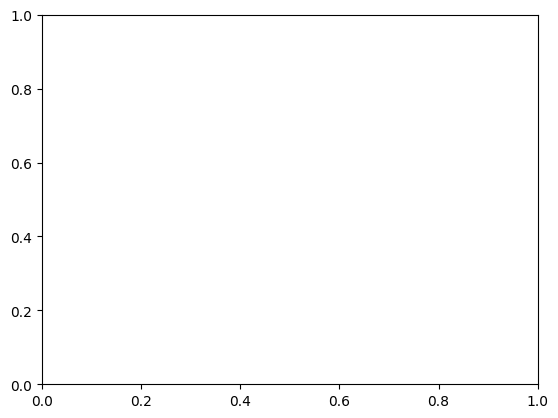

In [12]:
def yolo_to_matplotlib(label):
    x_center, y_center, width, height = label
    x1 = int((x_center - width / 2) * width)
    y1 = int((y_center - height / 2) * height)
    x2 = int(x1 + width * width)
    y2 = int(y1 + height * height)
    return x1, y1, x2, y2

label = [0.609865, 0.577242, 0.298938, 0.329609]
x1, y1, x2, y2 = yolo_to_matplotlib(label)

fig, ax = plt.subplots()


220 364 263 474


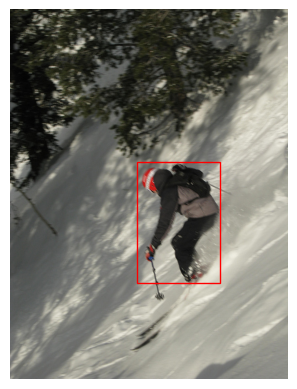

In [23]:
# Display the image
plt.imshow(img_array)
plt.axis('off')

for anno in annos:
    x_center, y_center, width, height = [0.609865, 0.577242, 0.298938, 0.329609]
    x1 = int((x_center - width / 2) * 480)
    y1 = int((y_center - height / 2) * 640)
    x2 = int((x_center + width / 2) * 480)
    y2 = int((y_center + height / 2) * 640)
    print(x1, x2, y1, y2)
    
    rect = plt.Rectangle((x1, y1), (x2 - x1), (y2 - y1), linewidth=1, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.show()

In [77]:
with open('./000000262146.jpg' , 'wb') as handler:
        handler.write(img_data)

In [48]:
img = coco.loadImgs(524291)

In [79]:
try:
    coco.loadAnns(436)
    print("work")
except KeyError:
    print("not work")

not work


In [73]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
nms

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [78]:
images

[{'license': 2,
  'file_name': '000000262145.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000262145.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-20 02:07:55',
  'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg',
  'id': 262145},
 {'license': 1,
  'file_name': '000000262146.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000262146.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-19 23:07:16',
  'flickr_url': 'http://farm6.staticflickr.com/5090/5341741494_1f653cdb80_z.jpg',
  'id': 262146},
 {'license': 3,
  'file_name': '000000524291.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000524291.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-18 09:59:07',
  'flickr_url': 'http://farm2.staticflickr.com/1045/934293170_d1b2cc58ff_z.jpg',
  'id': 524291},
 {'license': 1,
  'file_name': '000000262148.jpg',
  'coco_url': 'http://images.cocodataset.org/train201

In [69]:
images

[{'license': 2,
  'file_name': '000000262145.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000262145.jpg',
  'height': 427,
  'width': 640,
  'date_captured': '2013-11-20 02:07:55',
  'flickr_url': 'http://farm8.staticflickr.com/7187/6967031859_5f08387bde_z.jpg',
  'id': 262145},
 {'license': 1,
  'file_name': '000000262146.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000262146.jpg',
  'height': 640,
  'width': 480,
  'date_captured': '2013-11-19 23:07:16',
  'flickr_url': 'http://farm6.staticflickr.com/5090/5341741494_1f653cdb80_z.jpg',
  'id': 262146},
 {'license': 3,
  'file_name': '000000524291.jpg',
  'coco_url': 'http://images.cocodataset.org/train2017/000000524291.jpg',
  'height': 426,
  'width': 640,
  'date_captured': '2013-11-18 09:59:07',
  'flickr_url': 'http://farm2.staticflickr.com/1045/934293170_d1b2cc58ff_z.jpg',
  'id': 524291},
 {'license': 1,
  'file_name': '000000262148.jpg',
  'coco_url': 'http://images.cocodataset.org/train201

In [67]:
coco.getImgIds(catIds=[1])

[262145,
 262146,
 524291,
 262148,
 393223,
 393224,
 524297,
 393227,
 131084,
 393230,
 262161,
 131089,
 524311,
 393241,
 524314,
 393243,
 262171,
 131101,
 524317,
 262175,
 524320,
 393251,
 131108,
 524325,
 36,
 131115,
 524333,
 262191,
 49,
 524338,
 393267,
 393268,
 262197,
 393271,
 262200,
 131127,
 61,
 262207,
 393284,
 74,
 393290,
 262221,
 524366,
 77,
 131152,
 524373,
 262229,
 86,
 524375,
 393306,
 262235,
 262238,
 262239,
 262242,
 131172,
 393317,
 131174,
 109,
 110,
 524401,
 113,
 262260,
 393333,
 131197,
 127,
 262273,
 262274,
 262275,
 524420,
 136,
 131208,
 131211,
 524428,
 262286,
 524431,
 131215,
 524436,
 149,
 151,
 131225,
 262299,
 393372,
 393375,
 524450,
 165,
 524453,
 393384,
 524459,
 131245,
 524467,
 524470,
 524476,
 262334,
 262335,
 192,
 262336,
 393411,
 524486,
 201,
 393418,
 393419,
 131276,
 131277,
 131279,
 131280,
 262353,
 131282,
 393428,
 262359,
 524507,
 393438,
 393442,
 131299,
 524522,
 524525,
 241,
 131315,
 524

In [25]:

for ann in img_ann:
    current_category = ann['category_id'] - 1 # As yolo format labels start from 0 
    current_bbox = ann['bbox']
    x = current_bbox[0]
    y = current_bbox[1]
    w = current_bbox[2]
    h = current_bbox[3]
    # Finding midpoints
    x_centre = (x + (x+w))/2
    y_centre = (y + (y+h))/2

    # Normalization
    x_centre = x_centre / img_w
    y_centre = y_centre / img_h
    w = w / img_w
    h = h / img_h

    # Limiting upto fix number of decimal places
    x_centre = format(x_centre, '.6f')
    y_centre = format(y_centre, '.6f')
    w = format(w, '.6f')
    h = format(h, '.6f')
    print(f"{current_category} {x_centre} {y_centre} {w} {h}\n")

NameError: name 'img_w' is not defined

In [56]:
ann[0]['bbox']

[353.83, 453.61, 34.58, 31.85]